In [72]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# 16. Регуляризация А.Н. Тихонова

Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется регуляризованной по отношению к системе $Ax = b$. Параметр $\alpha$ называется параметром регуляризации. Метод регуляризации А.Н.\,Тихонова заключается в выборе последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) и решении регуляризованных систем $(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа значений $\alpha_k$, и выборе из всех полученных решений того, при котором норма невязки для исходной системы минимальна.

Написать функцию

    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
в которой A и b – матрица и левая часть исходной системы, alpha – вектор, содержащий набор параметров регуляризации, x – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, discr – вектор полученных таким образом невязок, x0 – регуляризованное решение (из найденных) с минимальной нормой невязки, discr0, alpha0 – соответствующие ему значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Построить график зависимости ошибки и нормы невязки от порядка системы.

Для конкретной системы построить графики зависимости ошибки и нормы невязки от параметра alpha.

Интуиция: Система $(A^{\rm T}A+αE)x=A^{\rm T}b$ при маленьком $α\ge 0$ (например, $α=0$) может быть вырожденной или плохо обусловленной, что приводит к большим ошибкам при численном решении системы. При большом $α$ система хорошо обусловлена, но может слишком сильно отличаться от исходной системы $Ax=b$. Нужно найти компромисс, т.е. «оптимальное» значение $α$: не очень большое и не очень маленькое.

### Напишем функцию

Пусть функция будет возвращать на один параметр больше - normDiscr - вектор нормализованных невязок, для удобства в будущем

In [73]:
def tikhonov(A, b, alpha):
    E = np.eye(A.shape[0])
    At=np.transpose(A)
    
    x = []
    discr = np.array([])
    normDiscr = np.array([])

    for i in range(len(alpha)):
        xNew = linalg.solve(At@A + alpha[i]*E, At@b)
        if i == 0: 
            x = xNew
        else:
            x = np.hstack((x,xNew))
        discr = np.append(discr, A@xNew - b)
        normDiscr = np.append(normDiscr, linalg.norm(A@xNew - b))
        
    discr0 = min(normDiscr)
    x0 = x[ :, list(normDiscr).index(discr0)]
    alpha0 = alpha[list(normDiscr).index(discr0)]
    return x0, discr0, alpha0, x, discr, normDiscr

### Проведём эксперимент с плохообусловленными матрицами из №8

Для начала создадим эти самые плохообусловленные матрицы  $A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная матрицы и массивы их порядков

In [74]:
A = [] 
B = [] 
aShapes = [] 
aShapesErr = np.array([])

for i in range(1, 14):
    aNew = np.tril(np.random.rand(i,i))@np.triu(np.random.rand(i,i))
    A.append(aNew)
    B.append(np.random.rand(i,1))
    aShapes = np.append(aShapes ,np.full((300,),int(aNew.shape[0])))
    aShapesErr = np.append(aShapesErr, np.full((aNew.shape[0]*300,),aNew.shape[0]))

Далее напишем и заполним при помощи ранее написанной нами функции массивы невязок(ошибок) и нормализованных невязок

In [75]:
alpha = np.linspace(10**-6, 10**-4, 300)
errorArr = np.array([])
normDiscrArr = np.array([])

for i in range(0, len(A)):
    x0, discr0, alpha0, x, discr, normDiscr = tikhonov(A[i], B[i], alpha)
    errorArr = np.append(errorArr, discr)
    normDiscrArr = np.append(normDiscrArr, normDiscr)

### Построим графики зависимости ошибки и нормы невязки от порядка системы.


 Графики зависимости нормы невязки и ошибки от порядка системы


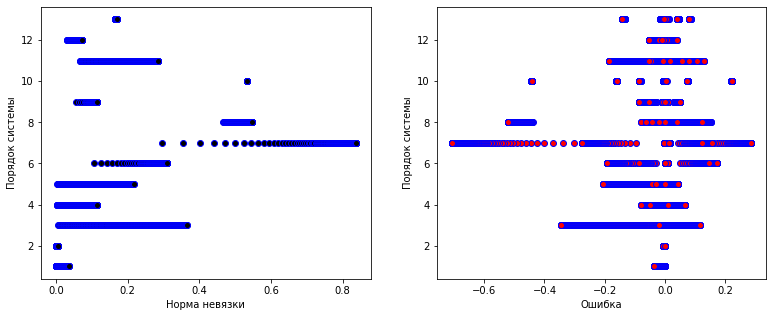

In [76]:
fig, (plt1, plt2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(13, 5)
)

print("\n Графики зависимости нормы невязки и ошибки от порядка системы")

plt1.scatter(x=normDiscrArr, y=aShapes, marker='o', c='0', edgecolor='b')
plt1.set_xlabel("Норма невязки")
plt1.set_ylabel("Порядок системы")

plt2.scatter(x=errorArr, y=aShapesErr, marker='o', c='r', edgecolor='b')
plt2.set_xlabel("Ошибка")
plt2.set_ylabel("Порядок системы")
plt.show()
pass

### Напишем конкретную случайную систему и построим графики зависимости ошибки и нормы невязки от параметра alpha.

In [ ]:
A = np.random.rand(14,14)
b = np.random.rand(14,1)
x0, discr0, alpha0, x, discr, normDiscrArr = tikhonov(A, b, alpha)
#print(len(discr))
#print(alpha.shape[0])
newAlpha =  np.linspace(0, 1, alpha.shape[0]*14)
for i in range(0, alpha.shape[0]*14):
  newAlpha[i] = alpha[i//14]

In [ ]:
fig, (plt1, plt2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(13, 5)
)

print("\n Графики зависимости ошибки и нормы невязки от параметра alpha конкретной случайной системы")

plt1.scatter(x=newAlpha, y=discr, marker='o', c='r', edgecolor='b')
plt1.set_xlabel("alpha")
plt1.set_ylabel("Ошибка")

plt2.scatter(x=alpha, y=normDiscrArr, marker='o', c='r', edgecolor='b')
plt2.set_xlabel("alpha")
plt2.set_ylabel("Норма невязки")

plt.show()
pass

### Вывод:

С возрастанием системы кол-во ошибок и норм невязок увеличивается. В случае с alpha ситуация повторяется